`Дисциплина: Методы и технологии машинного обучения`   
`Уровень подготовки: бакалавриат`   
`Направление подготовки: 01.03.02 Прикладная математика и информатика`   
`Семестр: осень 2021/2022`   




# Лабораторная работа №1: Оценка точности модели с непрерывной зависимой переменной

В практических примерах ниже показано:   

* как делить данные на выборки (обучающую и тестовую);  
* как считать MSE: среднеквадратическую ошибку модели;  
* как меняются MSE на тестовой и обучающей выборках с изменением гибкости (числа степеней свободы) модели.  

*Модели*: сглаживающие сплайны.   
*Данные*: сгенерированные.   

Рассмотрим пример из лекции: как меняется поведение ошибок на тестовой и обучающей выборках при различном числе степеней свободы, если функция зависимости отклика $Y$ от единственного признака $X$ известна. Сгенерируем $X$ и $Y$:

* $X \sim U(5, 105)$   
* $Y = f(X) + \epsilon$, где $f(X) = 4 - 0.02X + 0.0055X^2 - 4.9 \cdot 10^{-5} \cdot X^3$; $\epsilon \sim N(0, 1)$.  



## Технические подробности    

В данном скрипте мы используем для сглаживания функцию `smooth.spline()` из библиотеки языка статистической обработки данных R. Для того чтобы запускать функции R в Python нам нужен пакет `rpy2`, который не работает в версии Python 3.8; для него необходима версия 3.5. На этом примере мы научимся создавать в Anaconda новое рабочее окружение, устанавливать в него нужную версию Python и все необходимые для работы пакеты.   


### Шаг 1: создать в навигаторе новое рабочее окружение и сделать его активным

В меню Anaconda выбрать "Environments", затем нажать кнопку "Create" под списком доступных рабочих окружений.  

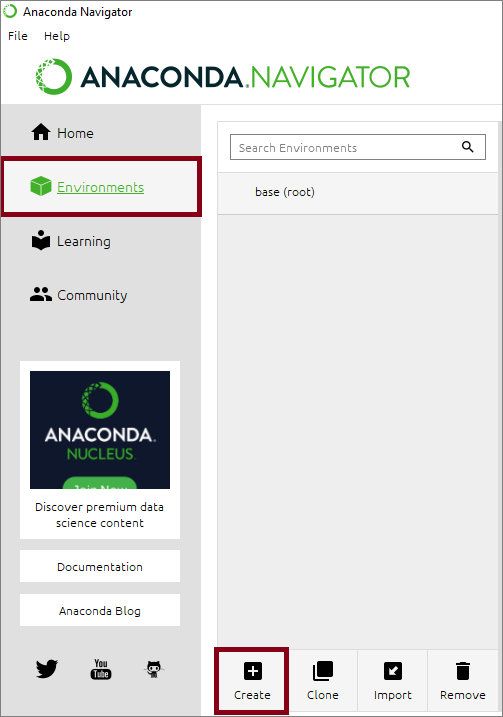

По умолчанию существует только окружение "base" с самой свежей версией Python. Назовём новое окружение "env01".  

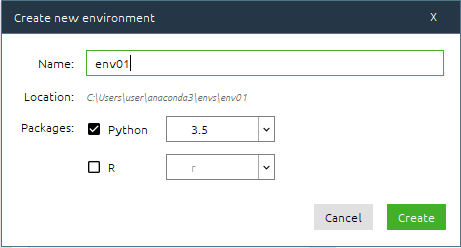

Двойной щелчок по новому окружению в списке делает его активным.   

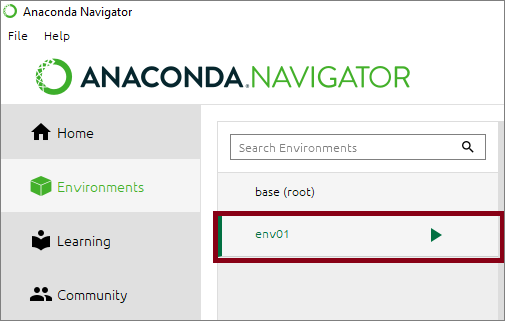

После чего следует вернуться в домашний раздел (пункт меню "Home"). Имя нового окружения появится над списком приложений.   

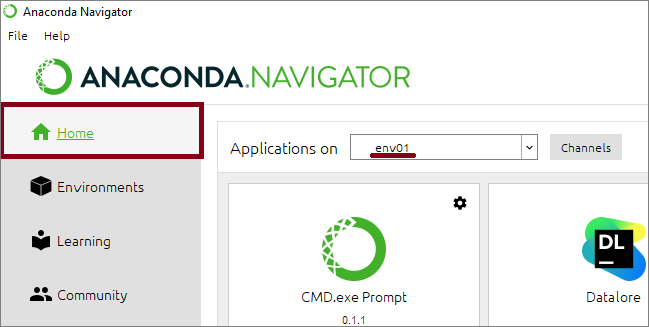


### Шаг 2: Установить необходимые пакеты   

Для выполнения лабораторной нам понадобятся пакеты: `numpy` (для генерации случайных чисел), `matplotlib` (для построения графиков), `rpy2` (для использования функций из R), `pandas` (для работы со фреймами данных). Установим их через консоль, открыв приложение CMD.exe Prompt.   

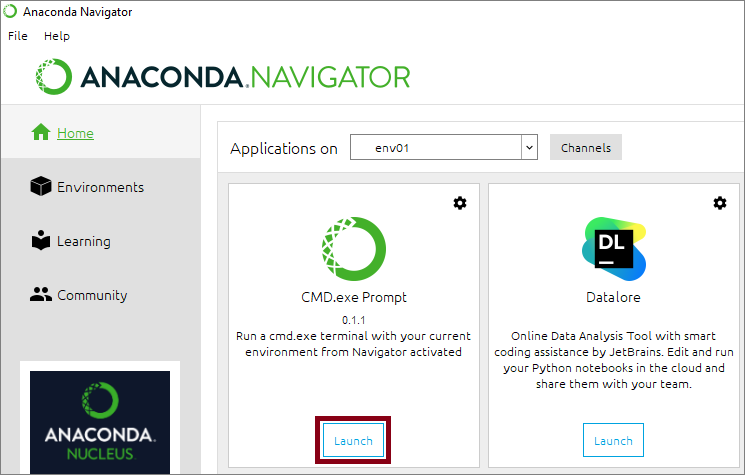

Чтобы установить пакет `numpy` через консоль, введём в открывшееся окно команду:   

`conda install numpy`

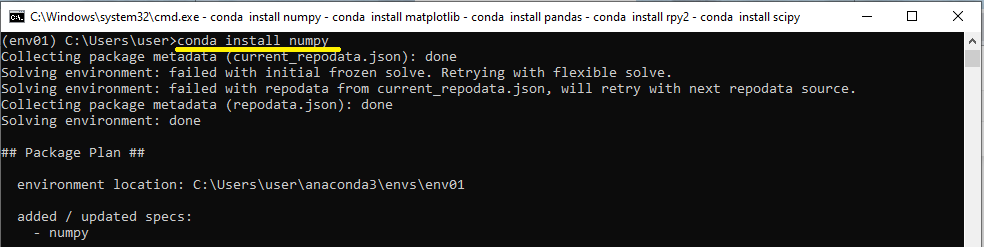

В процессе нужно будет подтвердить установку пакетов вводом `y`.   

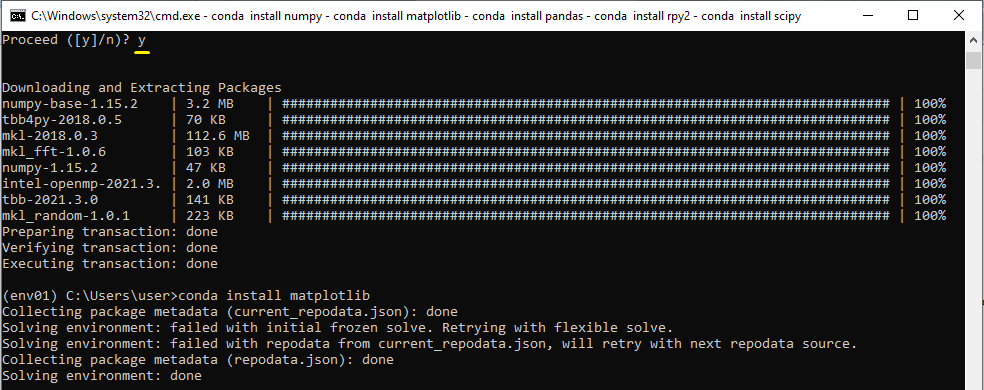

Остальные пакеты устанавливаются аналогично.


### Шаг 3: Запуск jupyter   

Откроем интерактивный редактор скриптов "jupyter":   

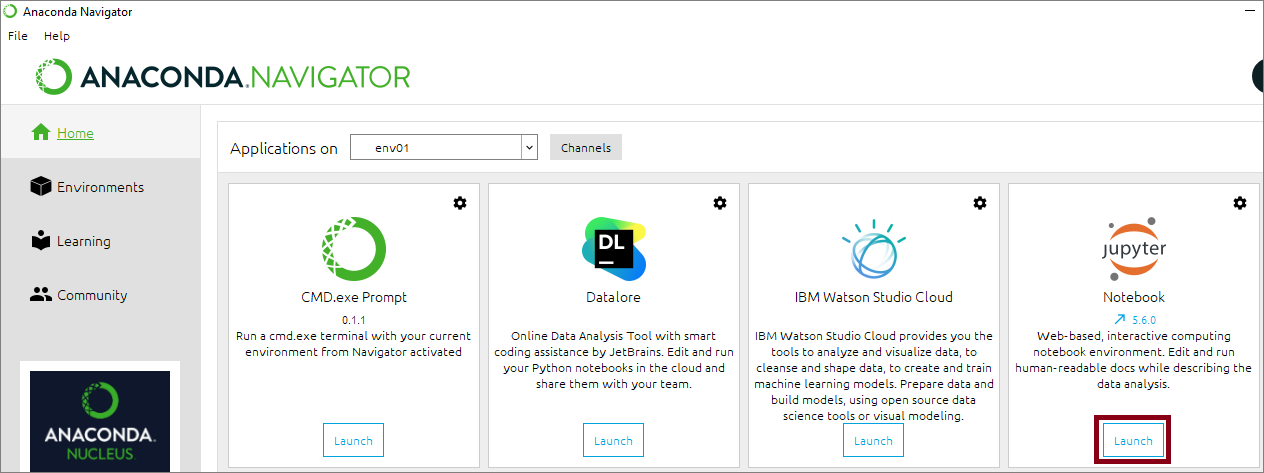

Редактор открывается в системном браузере по умолчанию, в директории пользователя. Удобнее установить другую директорию по умолчанию, чтобы видеть не все файлы, а только нужные скрипты. Вернёмся в окно консоли и запустим команду: `jupyter notebook --generate-config`, чтобы сгенерировать скрипт с настройками.   

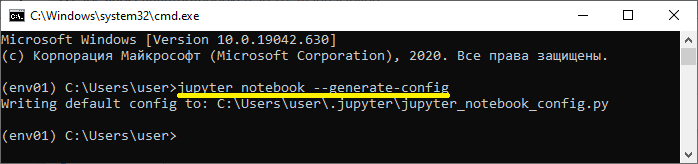

Найдём сгенерированный скрипт в папке, указанной в консоли после слов `Writing default config to`. Этот файл можно открыть в блокноте. Заменим строку:   

`#c.NotebookApp.notebook_dir = ''`

на строку:  

`c.NotebookApp.notebook_dir = '`*<папка с документами пользователя>*`\Py-work'`

Здесь необходимо заменить "<папка с документами пользователя>" на расположение папки с документами на рабочем компьютере. Сохраним файл с настройками и перезапустим jupyter (кнопка "Quit" в окне браузера с jupiter >> повторно запустить jupyter в окне навигатора Anaconda).  

Теперь жмём "New" >> "Python 3", чтобы создать новый блокнот:   

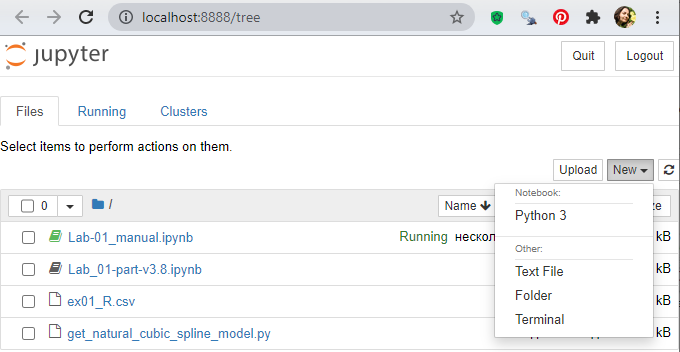

Введение в работу с блокнотами jupyter можно посмотреть в источнике [3].   



## Указания к выполнению


### Генерируем исходные данные

In [31]:
# загрузка пакетов
import numpy as np
import random

In [32]:
# задаём ядро генератора случайных чисел (внимание: не глобально)
np.random.seed(10111)

# всего наблюдений, доля обучающей выборки
n_all, train_percent = 60, 0.85

# параметры распределения X
x_min, x_max = 5, 105

# генерируем X
x = np.random.uniform(x_min, x_max, n_all)

# генерируем случайный шум
mu, sigma = 0, 1 
res = np.random.normal(mu, sigma, n_all)

# отбираем наблюдения в обучающую выборку
in_train = np.random.choice(np.arange(n_all), int(n_all*train_percent), replace=False)

# истинная функция взаимосвязи
def y_func (x) :
    return(4 - 2e-02*x + 5.5e-03*x**2 - 4.9e-05*x**3)
    
# для графика истинной взаимосвязи
x_line = np.linspace(x_min, x_max, n_all)
y_line = y_func(x_line)

# фактические значения y (с шумом)
y = y_func(x) + res

# создаём векторы с данными для построения графиков
# наблюдения на обучающей выборке
x_train = x[in_train]
y_train = y[in_train]

# наблюдения на тестовой выборке
x_test = np.delete(x, in_train)
y_test = np.delete(y, in_train)



### Строим графики   

Изобразим исходные данные на графике.   

In [33]:
# загрузка пакетов
import matplotlib.pyplot as plt

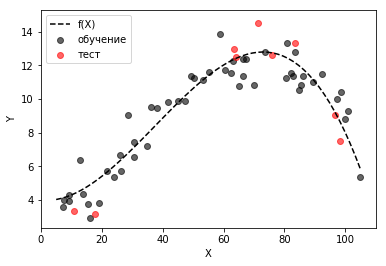

In [34]:
# график 1: исходные данные
#  обучающая выборка
plt.scatter(x_train, y_train, c='black', label='обучение', alpha=0.6)
#  тестовая выборка
plt.scatter(x_test, y_test, c='red', label='тест', alpha=0.6)
#  истинная функция взаимосвязи
plt.plot(x_line, y_line, c='black', linestyle='dashed', label='f(X)')
#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')
#  легенда
plt.legend()
plt.show()

## Обучаем модели и оцениваем их точность

В качестве модели используем сплайны со степенями свободы от 2 (прямая) до 40 (количество узлов равно 2/3 наблюдений). Строим модели с различным количеством степеней свободы и в каждом случае считаем среднеквадратическую ошибку модели на обучающей и тестовой выборках.    

In [35]:
# загрузка пакетов
from pandas import DataFrame
import rpy2.robjects as robjects

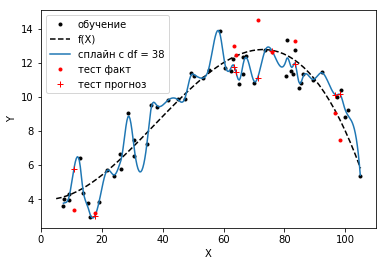

In [36]:
# модель натурального сплайна с заданным количеством узлов (df)
my_df = 38

# сохраняем индексы отсортированного по возрастанию x из обучающей выборки
x_sorted_index = sorted(range(len(x_train)), key=lambda k: x_train[k])

# равноотстоящие координаты по X для прорисовки сглаженной кривой
x_train_lin = np.linspace(min(x_train), max(x_train), num=300, endpoint=True)

# создаём из данных объекты, понятные R
r_x = robjects.FloatVector(x_train)
r_y = robjects.FloatVector(y_train)

# импортируем нужную функцию из R
r_smooth_spline = robjects.r['smooth.spline']

# строим сглаживающий сплайн
fit = r_smooth_spline(x=r_x, y=r_y, df=my_df)

# делаем прогнозы
y_hat_train = np.array(robjects.r['predict'](fit, 
    robjects.FloatVector(x_train)).rx2('y'))
y_hat_test = np.array(robjects.r['predict'](fit, 
    robjects.FloatVector(x_test)).rx2('y'))
y_lin_plot = np.array(robjects.r['predict'](fit, 
    robjects.FloatVector(x_train_lin)).rx2('y'))

# строим график
plt.plot(x_train, y_train, color='black', ls='', marker='.', label='обучение')
plt.plot(x_line, y_line, color='black', ls='dashed', marker='', label='f(X)')
plt.plot(x_train_lin, y_lin_plot, marker='', label='сплайн с df = %s' % my_df)
plt.plot(x_test, y_test, color='red', ls='', marker='.', label='тест факт')
plt.plot(x_test, y_hat_test, color='red', ls='', marker='+', label='тест прогноз')
#  подписи осей
plt.xlabel('X')
plt.ylabel('Y')
# легенда
plt.legend(loc='best')

# считаем MSE
MSE_fit = [sum((y_train - y_hat_train)**2) / len(y_train), 
           sum((y_test - y_hat_test)**2) / len(y_test)]

Ошибки на обучающей и тестовой выборках составили соответственно:

In [37]:
# выводим MSE с округлением
np.around(MSE_fit, 2)

array([0.11, 3.32])

In [38]:
#  Теперь строим модели с df от 2 до 40 ########################################

# максимальное число степеней свободы для модели сплайна
max_df = 40

# фрейм данных для сохранения MSE на обучающей и на тестовой 
#  при разных степенях свободы
MSE_all_dfs = [[0] * 2 for i in range(2, max_df+1)]
MSE_all_dfs = DataFrame(MSE_all_dfs, columns=['MSE_train', 'MSE_test'],
                       index=list(range(2, max_df+1)))

# заполняем фрейм
for i_df in range(2, max_df+1) :
    
    # обучаем модель
    fit = r_smooth_spline(x=r_x, y=r_y, df=i_df)
    
    # прогноз на обучающей выборке
    y_train_hat = np.array(robjects.r['predict'](fit, 
        robjects.FloatVector(x_train)).rx2('y'))
    # прогноз на тестовой выборке
    y_test_hat = np.array(robjects.r['predict'](fit, 
        robjects.FloatVector(x_test)).rx2('y'))
    
    # считаем MSE
    MSE_all_dfs.loc[i_df, 'MSE_train'] = \
        sum((y_train - y_train_hat)**2) / len(y_train_hat)
    MSE_all_dfs.loc[i_df, 'MSE_test'] = \
        sum((y_test - y_test_hat)**2) / len(y_test_hat)

Минимум MSE на тестовой выборке достигается при числе степеней свободы:  

In [39]:
# фильтруем таблицу по минимальной MSE на тестовой выборке
MSE_all_dfs[MSE_all_dfs['MSE_test'] == min(MSE_all_dfs['MSE_test'])]

,MSE_train,MSE_test
6,0.805512,1.914443


Изобразим на графике динамику MSE на обучающей и тестовой выборках в зависимости от степеней свободы модели. 

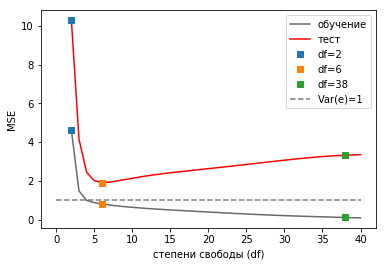

In [40]:
# график изменения MSE с увеличением df
plt.plot(MSE_all_dfs.index, MSE_all_dfs['MSE_train'], color='dimgrey', 
         marker='', label='обучение')
plt.plot(MSE_all_dfs.index, MSE_all_dfs['MSE_test'], color='red', 
         marker='', label='тест')
plt.plot([2, 2], [MSE_all_dfs.iloc[0]['MSE_train'], MSE_all_dfs.iloc[0]['MSE_test']],
         ls='', marker='s', label='df=2')
plt.plot([6, 6], [MSE_all_dfs.iloc[4]['MSE_train'], MSE_all_dfs.iloc[4]['MSE_test']],
         ls='', marker='s', label='df=6')
plt.plot([38, 38], [MSE_all_dfs.iloc[36]['MSE_train'], MSE_all_dfs.iloc[36]['MSE_test']],
         ls='', marker='s', label='df=38')
plt.hlines(1, 0, 40, linestyles='dashed', color='grey', label='Var(e)=1')
#  подписи осей
plt.xlabel('степени свободы (df)')
plt.ylabel('MSE')
# легенда
plt.legend(loc='best')

Кривая MSE на обучающей выборке стабильно снижается с ростом узлов сплайна. Чем больше наблюдений, через которые прошёл сплайн, тем точнее модель. Это говорит о переобучении. Лучшую модель следуют выбирать по минимуму на кривой MSE на тестовой выборке.  




# Упражнение 1   

1. Завести аккаунт на github.com.    

1. **Задача 1**. На данных своего варианта (см. второй столбец таблицы с вариантами) повторить расчёты и построить графики из первой лабораторной. Пояснить выбор наилучшего количества степеней свободы.   

1. **Задача 2**. Повторить расчёты, меняя характеристики согласно своему варианту (см. последний столбец таблицы с вариантами). Проанализировать, как меняется MSE при изменении характеристик.    

1. Блокнот jupyter с решением разместить github.com, выслать ссылку на репозиторий преподавателю. В репозитории должны лежать:
- файл README.md с кратким описанием содержимого репозитория и с ответами на вопросы задач;    
- блокнот jupyter (файл .ipynb) с решением.     

В отчёте с решением должны присутствовать, кроме блоков кода, вводный текст с постановкой задачи и анализ динамики MSE на тестовой и обучающей выборках в вашем варианте.   


## Варианты

Все условия, не упомянутые в таблице (величина выборки, закон распределения $X$ и т.д.) брать из примеров первой лабораторной.   

Номер варианта – номер студента в списке. Студент под номером 21 берёт вариант 1, под номером 22 – 2, и т.д.   

В качестве ядра генератора случайных чисел используйте номер своего варианта.  

<table border="1">
<tr>
<td width="5%", style='text-align:center; vertical-align:middle'>Номер варианта</td>
<td width="55%", style='text-align:center; vertical-align:middle'>Функция для задачи 1</td>
<td width="40%", style='text-align:center; vertical-align:middle'>Характеристики для задачи 2</td>
</tr>

<tr>
<td>1</td>
<td style='text-align:left; vertical-align:middle'>$f(X) = 13 + 3.5 \cdot \sin{\Big ( {x - 30 \over 9 } \Big )}$</td>
<td style='text-align:left; vertical-align:middle'>$n\_all = 600$, $n\_all = 550$, $n\_all = 500$</td>
</tr>

<tr>
<td>2</td>
<td style='text-align:left; vertical-align:middle'>$f(X) = 17 + 0.02 \cdot x -0.005 \cdot (x - 45)^2 + 0.00006 \cdot (x - 54)^3$</td>
<td style='text-align:left; vertical-align:middle'>$train\_percent = 0.9$, $train\_percent = 0.85$, $train\_percent = 0.8$</td>
</tr>

<tr>
<td>3</td>
<td style='text-align:left; vertical-align:middle'>$f(X) = 19 - 0.05 \cdot x$</td>
<td style='text-align:left; vertical-align:middle'>$sigma = 2$, $sigma = 3$, $sigma = 4$</td>
</tr>

<tr>
<td>4</td>
<td style='text-align:left; vertical-align:middle'>$f(X) = 11 + 3.5 \cdot \sin{\Big ( {x - 30 \over 9 } \Big )}$</td>
<td style='text-align:left; vertical-align:middle'>$train\_percent = 0.3$, $train\_percent = 0.25$, $train\_percent = 0.2$</td>
</tr>

<tr>
<td>5</td>
<td style='text-align:left; vertical-align:middle'>$f(X) = 15 + 0.02 \cdot x -0.005 \cdot (x - 45)^2 + 0.00006 \cdot (x - 54)^3$</td>
<td style='text-align:left; vertical-align:middle'>$sigma = 0.5$, $sigma = 1$, $sigma = 1.5$</td>
</tr>

<tr>
<td>6</td>
<td style='text-align:left; vertical-align:middle'>$f(X) = 21 - 0.05 \cdot x$</td>
<td style='text-align:left; vertical-align:middle'>$n\_all = 450$, $n\_all = 400$, $n\_all = 350$</td>
</tr>

<tr>
<td>7</td>
<td style='text-align:left; vertical-align:middle'>$f(X) = 5 + 3.5 \cdot \sin{\Big ( {x - 30 \over 9 } \Big )}$</td>
<td style='text-align:left; vertical-align:middle'>$sigma = 5.5$, $sigma = 6$, $sigma = 6.5$</td>
</tr>

<tr>
<td>8</td>
<td style='text-align:left; vertical-align:middle'>$f(X) = 15 + 0.02 \cdot x -0.005 \cdot (x - 45)^2 + 0.00006 \cdot (x - 54)^3$</td>
<td style='text-align:left; vertical-align:middle'>$n\_all = 300$, $n\_all = 250$, $n\_all = 200$</td>
</tr>

<tr>
<td>9</td>
<td style='text-align:left; vertical-align:middle'>$f(X) = 20 - 0.05 \cdot x$</td>
<td style='text-align:left; vertical-align:middle'>$train\_percent = 0.5$, $train\_percent = 0.45$, $train\_percent = 0.4$</td>
</tr>

<tr>
<td>10</td>
<td style='text-align:left; vertical-align:middle'>$f(X) = 6 + 3.5 \cdot \cos{\Big ( {x - 30 \over 12 } \Big )}$</td>
<td style='text-align:left; vertical-align:middle'>$n\_all = 150$, $n\_all = 100$, $n\_all = 50$</td>
</tr>

<tr>
<td>11</td>
<td style='text-align:left; vertical-align:middle'>$f(X) = 25 + 0.02 \cdot x -0.003 \cdot (x - 45)^2 + 0.00006 \cdot (x - 54)^3$</td>
<td style='text-align:left; vertical-align:middle'>$train\_percent = 0.2$, $train\_percent = 0.15$, $train\_percent = 0.1$</td>
</tr>

<tr>
<td>12</td>
<td style='text-align:left; vertical-align:middle'>$f(X) = 18 - 0.1 \cdot x$</td>
<td style='text-align:left; vertical-align:middle'>$sigma = 2.5$, $sigma = 2$, $sigma = 1.5$</td>
</tr>

<tr>
<td>13</td>
<td style='text-align:left; vertical-align:middle'>$f(X) = 25 + 0.02 \cdot x -0.003 \cdot (x - 45)^2 + 0.00006 \cdot (x - 54)^3$</td>
<td style='text-align:left; vertical-align:middle'>$n\_all = 600$, $n\_all = 550$, $n\_all = 500$</td>
</tr>

<tr>
<td>14</td>
<td style='text-align:left; vertical-align:middle'>$f(X) = 7 + 3.5 \cdot \cos{\Big ( {x - 30 \over 12 } \Big )}$</td>
<td style='text-align:left; vertical-align:middle'>$train\_percent = 0.9$, $train\_percent = 0.85$, $train\_percent = 0.8$</td>
</tr>

<tr>
<td>15</td>
<td style='text-align:left; vertical-align:middle'>$f(X) = 16 - 0.1 \cdot x$</td>
<td style='text-align:left; vertical-align:middle'>$sigma = 2$, $sigma = 3$, $sigma = 4$</td>
</tr>

<tr>
<td>16</td>
<td style='text-align:left; vertical-align:middle'>$f(X) = 25 + 0.02 \cdot x -0.003 \cdot (x - 45)^2 + 0.00006 \cdot (x - 54)^3$</td>
<td style='text-align:left; vertical-align:middle'>$train\_percent = 0.3$, $train\_percent = 0.25$, $train\_percent = 0.2$</td>
</tr>

<tr>
<td>17</td>
<td style='text-align:left; vertical-align:middle'>$f(X) = 9 + 3.5 \cdot \cos{\Big ( {x - 30 \over 12 } \Big )}$</td>
<td style='text-align:left; vertical-align:middle'>$n\_all = 450$, $n\_all = 400$, $n\_all = 350$</td>
</tr>

<tr>
<td>18</td>
<td style='text-align:left; vertical-align:middle'>$f(X) = 12 + 3.5 \cdot \sin{\Big ( {x - 30 \over 9 } \Big )}$</td>
<td style='text-align:left; vertical-align:middle'>$sigma = 6$, $sigma = 7$, $sigma = 8$</td>
</tr>

<tr>
<td>19</td>
<td style='text-align:left; vertical-align:middle'>$f(X) = 15 + 0.02 \cdot x -0.005 \cdot (x - 45)^2 + 0.00006 \cdot (x - 54)^3$</td>
<td style='text-align:left; vertical-align:middle'>$sigma = 6$, $sigma = 7$, $sigma = 8$</td>
</tr>

<tr>
<td>20</td>
<td style='text-align:left; vertical-align:middle'>$f(X) = 14 - 0.05 \cdot x$</td>
<td style='text-align:left; vertical-align:middle'>$n\_all = 850$, $n\_all = 900$, $n\_all = 950$</td>
</tr>

</table>




# Источники 

1. *James G., Witten D., Hastie T. and Tibshirani R.*  An Introduction to Statistical Learning with Applications in R. URL: [http://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf](https://drive.google.com/file/d/15PdWDMf9hkfP8mrCzql_cNiX2eckLDRw/view?usp=sharing)     
1. Python SciPy UnivariateSpline vs R smooth.spline / stackoverflow.com. URL: [https://stackoverflow.com/questions/56667657/python-scipy-univariatespline-vs-r-smooth-spline](https://stackoverflow.com/questions/56667657/python-scipy-univariatespline-vs-r-smooth-spline)   
1. Jupyter Notebook для начинающих: учебник / webdevblog.ru [https://webdevblog.ru/jupyter-notebook-dlya-nachinajushhih-uchebnik/](https://webdevblog.ru/jupyter-notebook-dlya-nachinajushhih-uchebnik/)